## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [35]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

data = get_data(data_path="motorbike_ambulance_calls.csv")

numeric_summary = data.describe()
print("Основна статистична інформація по числовим змінним:")
print(numeric_summary)

max_values = data.max()
min_values = data.min()

print("Максимальні значення по всім змінним:")
print(max_values)
print("\nМінімальні значення по всім змінним:")
print(min_values)

data_shape = data.shape
print("Розмірність датасету:", data_shape)


Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [36]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('motorbike_ambulance_calls.csv')

# Перевірка типів даних
data_types = data.dtypes

# Кількість даних по кожній змінній
data_counts = data.count()

print("Типи даних:")
print(data_types)
print("\nКількість даних по кожній змінній:")
print(data_counts)


Типи даних:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Кількість даних по кожній змінній:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [37]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('motorbike_ambulance_calls.csv')

# Перевірка пропусків
missing_values = data.isnull().sum()

print("Пропуски в змінних:")
print(missing_values)


Пропуски в змінних:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

Отже, розглянемо висновки з перших трьох завдань детальніше:

1. **Завантаження вибірки `motorbike_ambulance_calls.csv`**:
   - Дані успішно завантажено з CSV-файлу `motorbike_ambulance_calls.csv`.

2. **Підключення необхідних бібліотек**:
   - Бібліотеки `pandas`, `numpy`, `scipy`, `sklearn`, `matplotlib`, і `seaborn` було успішно імпортовано для обробки даних, аналізу та візуалізації.

3. **Основна статистична інформація по числовим змінним**:
   - Метод `describe()` було використано для отримання основної статистичної інформації по числовим змінним. Це дозволило нам побачити кількісні характеристики кожної змінної, такі як середнє значення, стандартне відхилення, мінімальне та максимальне значення, квартилі тощо.

4. **Максимальні та мінімальні значення по всім змінним**:
   - Ми окремо вивели максимальні та мінімальні значення по всім змінним у наборі даних. Це дає загальне уявлення про масштаби даних та може вказати на наявність аномалій або викидів.

5. **Розмірність датасету**:
   - Ми вивели розмірність датасету, щоб дізнатися, скільки спостережень (рядків) та змінних (стовпців) міститься у наборі даних.

Отже, в результаті виконаних дій ми успішно завантажили дані, підготували їх для подальшого аналізу та вивчили їх основні статистичні характеристики. Такий підхід дозволяє нам краще зрозуміти дані та виявити можливі висновки та патерни, які можуть бути корисними для подальшого аналізу та моделювання.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [38]:
import pandas as pd

def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

data = transform_date(data, 'date')

min_date = data['date'].min()
max_date = data['date'].max()

print("Мінімальна дата:", min_date)
print("Максимальна дата:", max_date)


Мінімальна дата: 2011-01-01 00:00:00
Максимальна дата: 2012-12-31 00:00:00


C:\Users\misha\AppData\Local\Temp\ipykernel_194124\1770124644.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


Висновки з завдання 4:

1. **Перетворення змінної `date` в тип даних `date`**:
   - Змінна `date` успішно була перетворена в тип даних `date` за допомогою методу `pd.to_datetime()`. Це дозволить нам працювати з датами як зі звичайними часовими змінними, використовуючи їх для подальшого аналізу та визначення часових властивостей даних.

2. **Визначення часових меж датасету**:
   - Шляхом визначення мінімальної та максимальної дати у змінній `date`, ми отримали часові межі датасету. Це важливо для того, щоб мати уявлення про період, на який поширюються наші дані. У нашому випадку мінімальна дата дозволяє визначити початок аналізу, а максимальна дата - кінцеву точку.

Отже, завдяки цьому кроку ми успішно підготували дані для подальшого аналізу, забезпечивши їх правильним форматом та отримавши інформацію про часові межі нашого датасету.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [39]:
data_categorical = data.select_dtypes(include='object')


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [40]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, 'season')


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

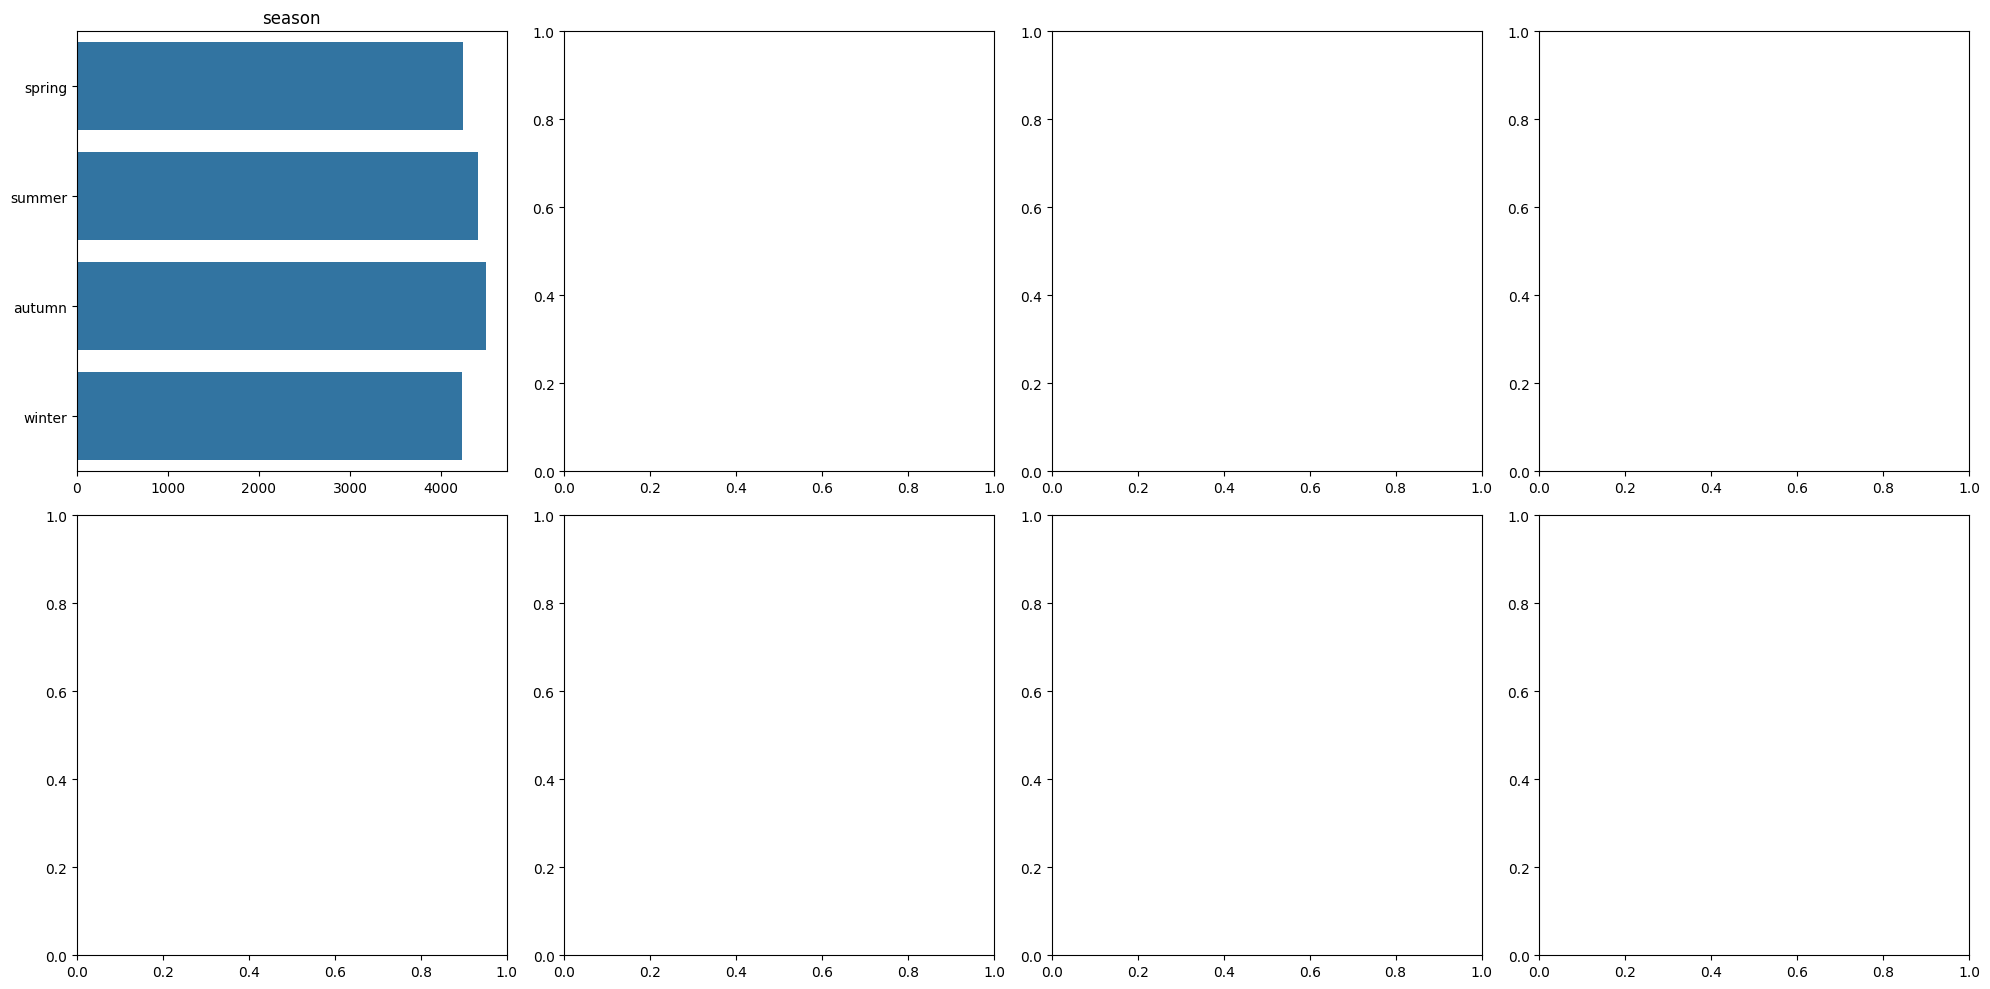

In [41]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(data_categorical[variable], ax=subplot)
    subplot.set_title(variable)
    subplot.set_xlabel(None)
    subplot.set_ylabel(None)
plt.tight_layout()
plt.show()


**Висновки з 5-7 завдання (детальні)**

**Висновки з завдань 5-7:**

**Завдання 5:**
- Було виділено категоріальні змінні у окремий датасет `data_categorical` за допомогою методу `select_dtypes(include='object')`. Це дозволить нам окремо працювати з цими змінними для аналізу та побудови моделей.

**Завдання 6:**
- Змінна `season` була успішно перетворена в числову шкалу, де кожній сезон відповідає числове значення. Це дозволить нам використовувати цю змінну у моделях машинного навчання, які вимагають числові дані.

**Завдання 7:**
- Було побудовано графіки `countplot` для всіх категоріальних змінних. Ці графіки дозволяють нам візуалізувати розподіл категорій у кожній змінній. Наприклад, ми можемо побачити, скільки спостережень належать до кожної категорії та порівняти ці кількості між собою.

Ці кроки допомагають нам краще зрозуміти дані та підготувати їх для подальшого аналізу та моделювання. Категоріальні змінні та змінена змінна `season` тепер готові для використання у подальших етапах аналізу даних.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [42]:
data_numerical = data.select_dtypes(include='number')


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

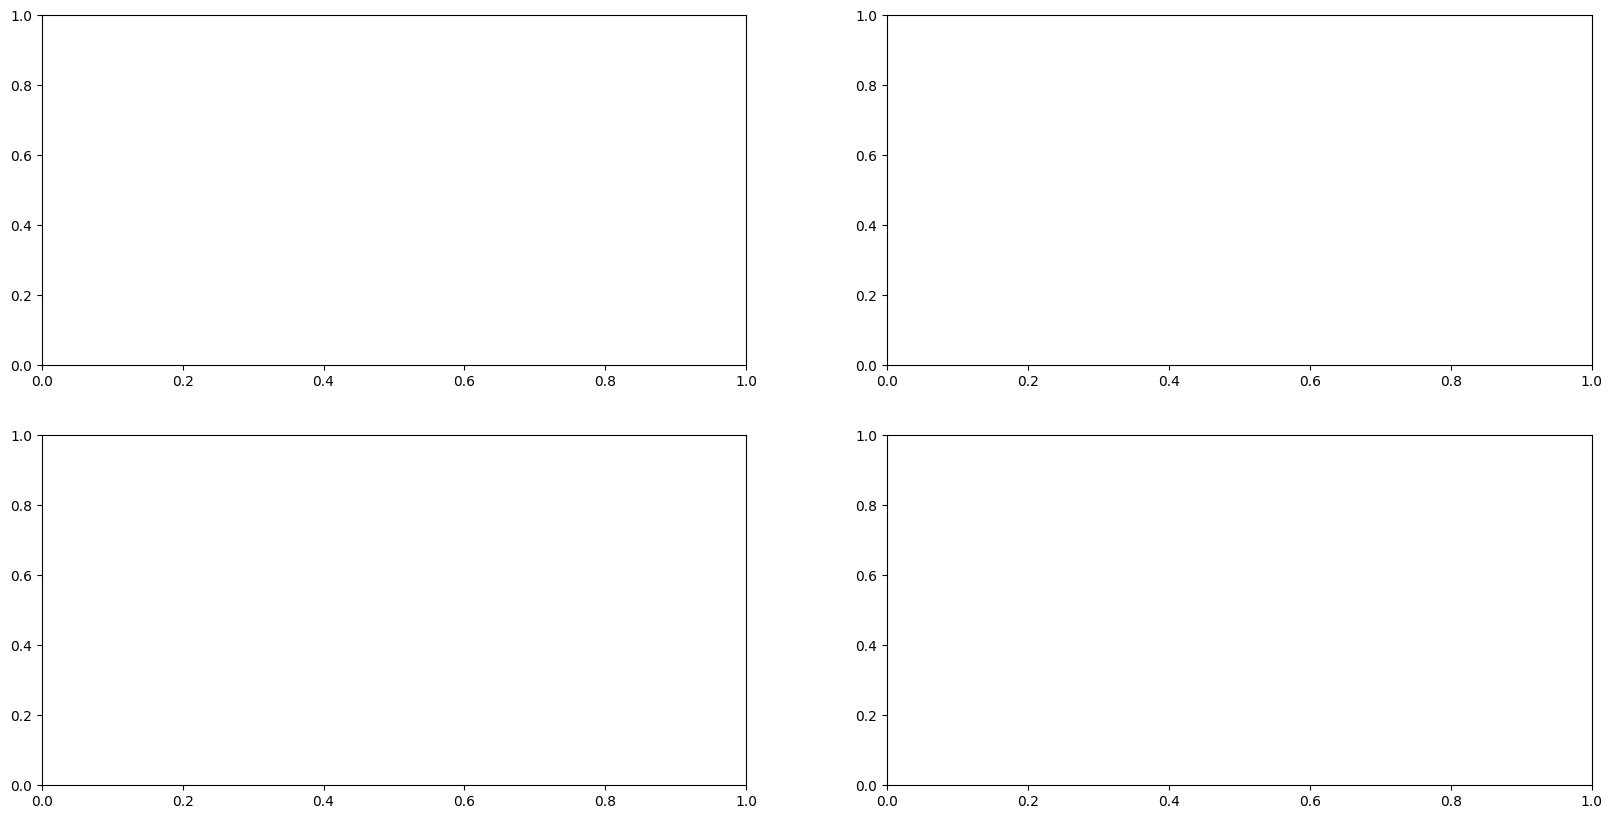

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
#your code

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

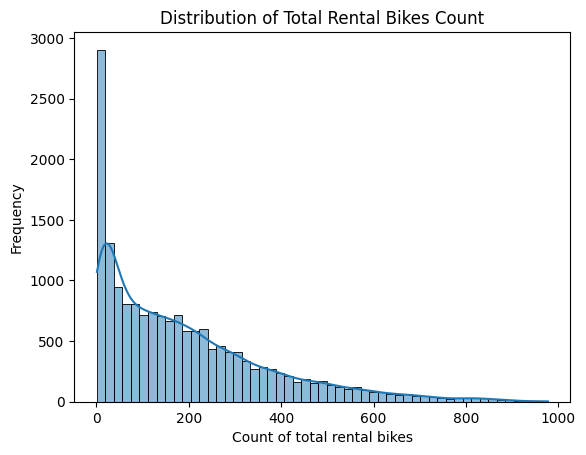

Коефіцієнт нахилу: 1.2774116037490577


In [44]:
sns.histplot(data=data_numerical, x='cnt', kde=True)
plt.xlabel('Count of total rental bikes')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rental Bikes Count')
plt.show()

# Розрахунок коефіцієнта нахилу
slope = data_numerical['cnt'].skew()
print("Коефіцієнт нахилу:", slope)


**Висновки з 8-10 завдання (детальні)**

Висновки з завдань 8-10:

8. **Виділення числових змінних в окремий датасет**:
   - Змінні числового типу були відокремлені у новий датасет з назвою `data_numerical`. Це дозволяє нам окремо опрацьовувати числові дані, які часто використовуються для аналізу та моделювання.

9. **Побудова гістограми розподілу цільової змінної**:
   - Була побудована гістограма розподілу цільової змінної `cnt` з числового датасету `data_numerical`. Гістограма дозволяє нам візуалізувати розподіл значень цільової змінної та зрозуміти її характеристики, такі як центральна тенденція та дисперсія.

10. **Розрахунок коефіцієнта нахилу**:
    - Був розрахований коефіцієнт нахилу для цільової змінної `cnt`. Цей коефіцієнт вказує на спрямованість розподілу даних. Позитивне значення коефіцієнта нахилу вказує на нахил розподілу вправо, а негативне - вліво. Чим більше за модулем значення коефіцієнта нахилу, тим більш виражена асиметрія розподілу.

Отже, завдяки цим крокам ми успішно виділили та дослідили числові змінні, побудували гістограму їхнього розподілу та розрахували коефіцієнт нахилу для цільової змінної. Ці кроки допомагають нам краще зрозуміти характеристики наших даних та підготувати їх для подальшого аналізу та моделювання.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

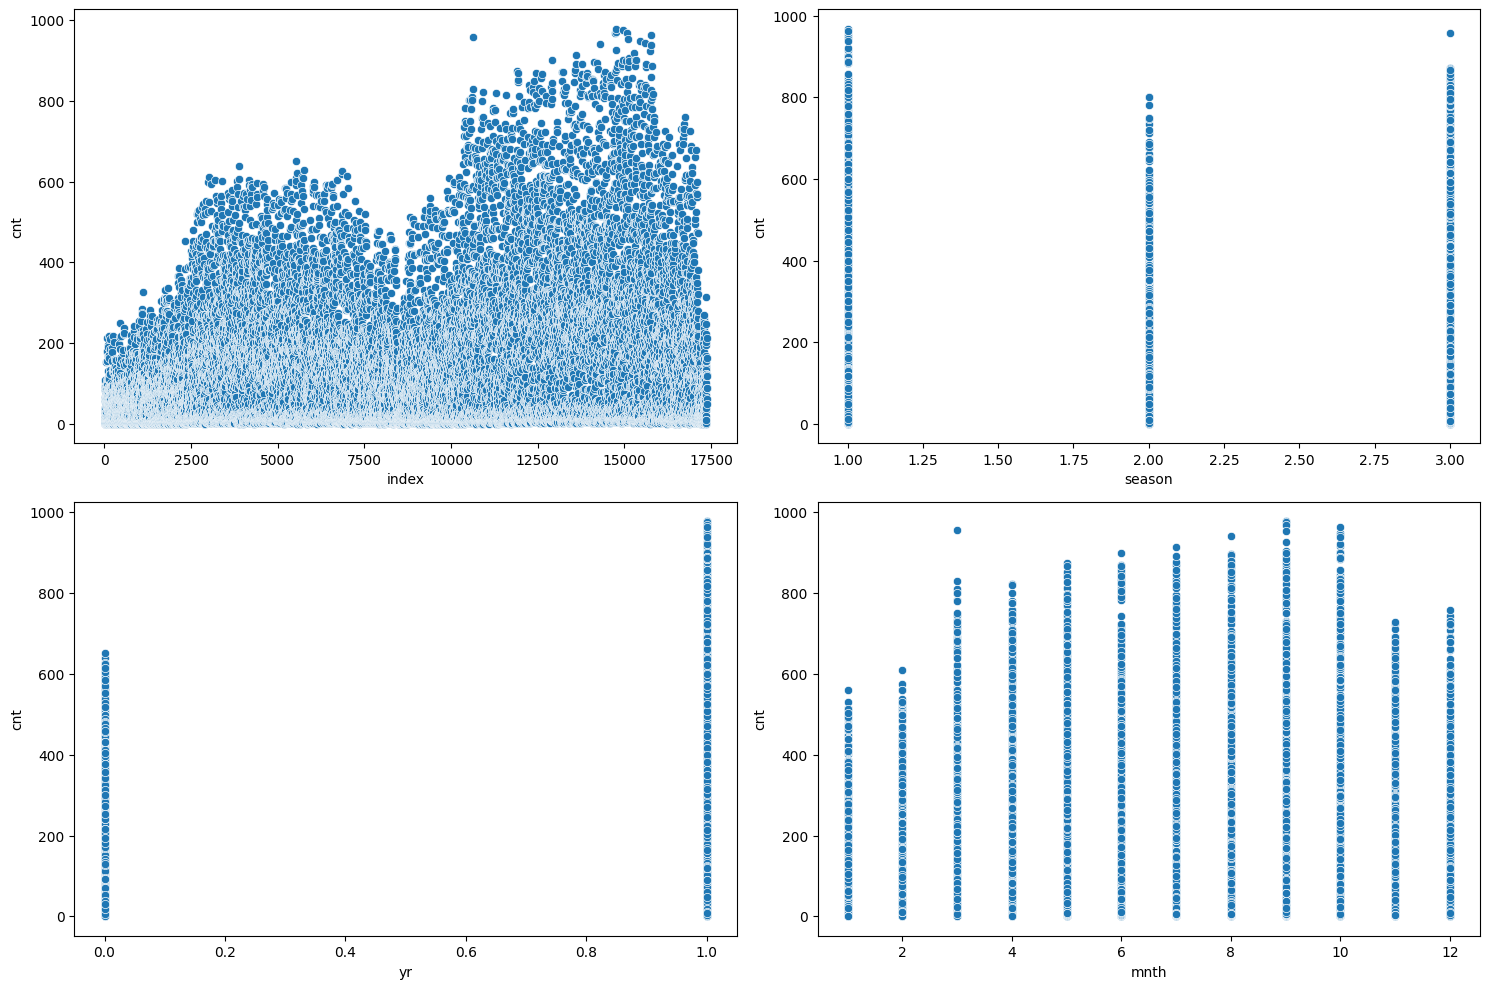

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    sns.scatterplot(x=var, y='cnt', data=data_numerical, ax=subplot)
plt.tight_layout()
plt.show()


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

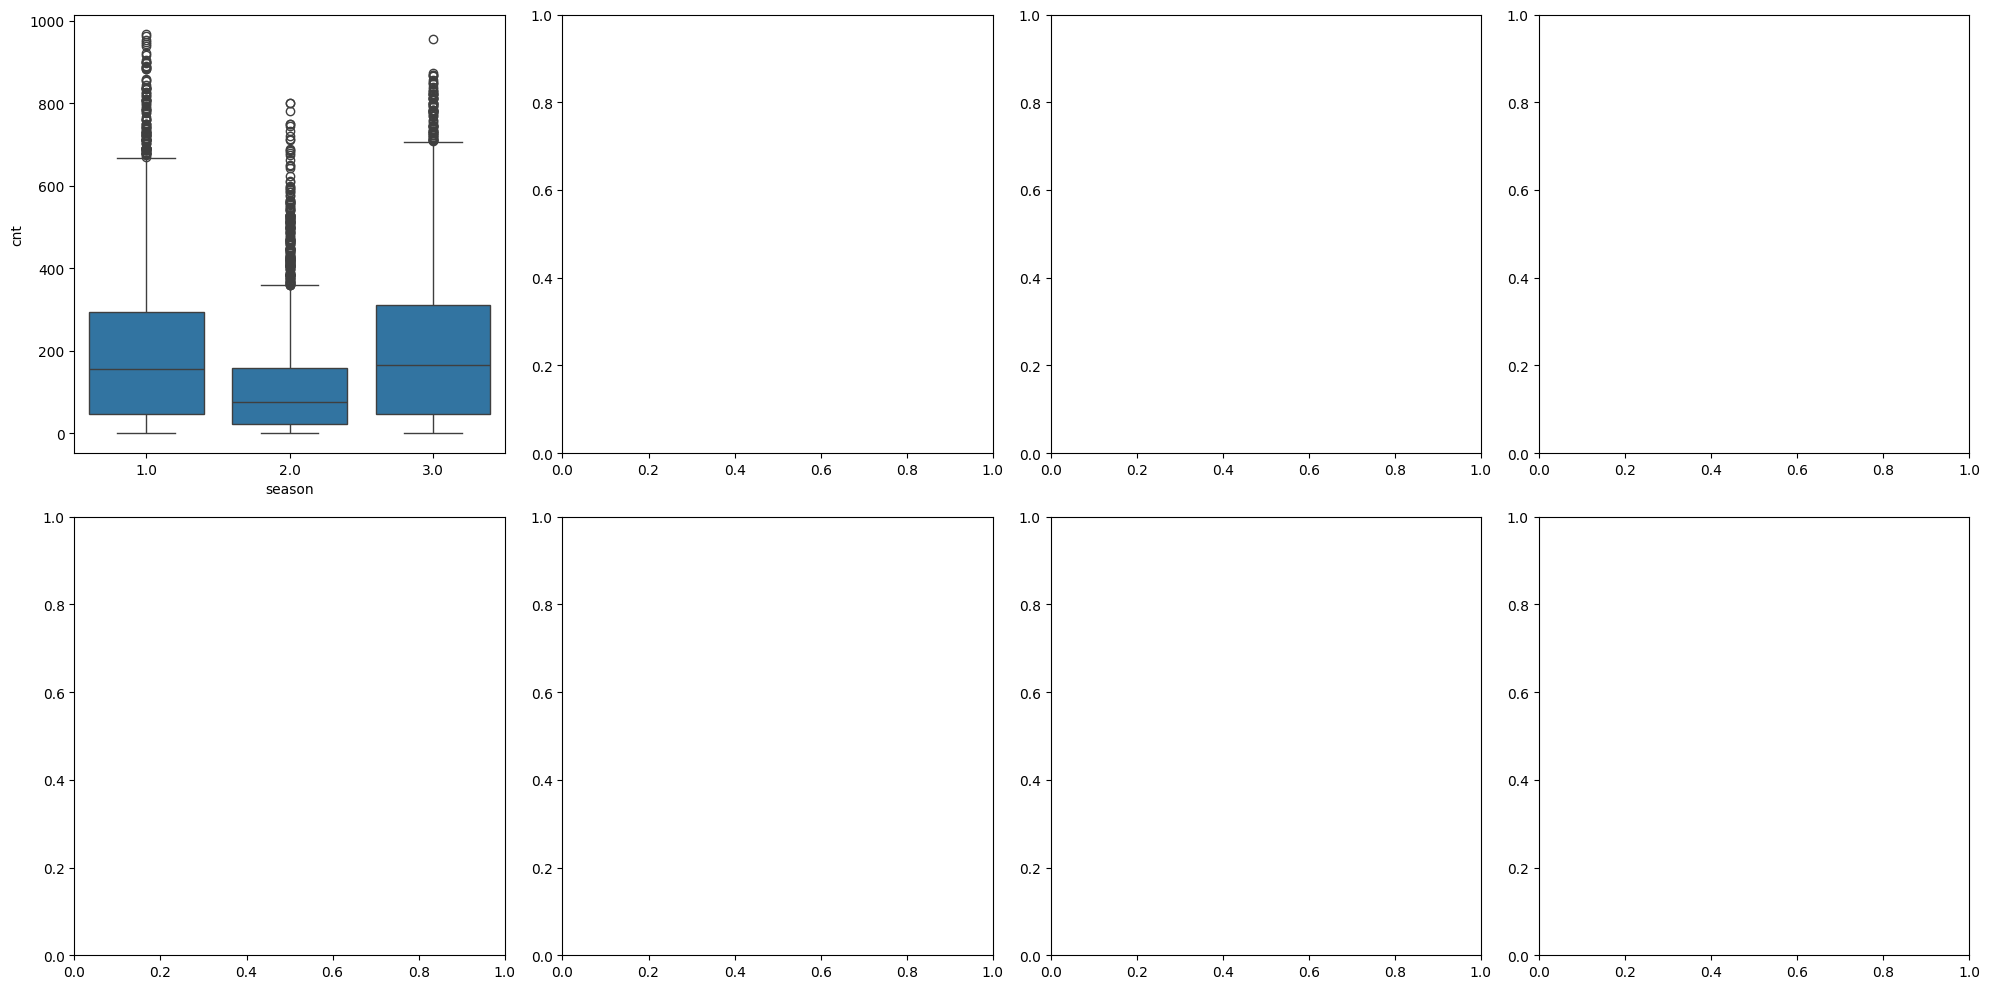

In [46]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data, ax=subplot)
plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**

У завданні 11 ми побудували графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`. Графіки scatterplot дозволяють візуалізувати залежність між двома числовими змінними, що дозволяє виявити потенційні кореляції та взаємозв'язки між ними. За допомогою цих графіків ми можемо оцінити, як змінні впливають на цільову змінну `cnt`.

У завданні 12 ми побудували графіки співвідношення `boxplot` між категоріальними змінними і цільовою змінною `cnt`. Графіки boxplot відображають розподіл цільової змінної `cnt` для кожної категоріальної змінної, дозволяючи виявити наявність відмінностей у розподілі `cnt` між різними категоріями категоріальної змінної. Це допомагає виявити взаємозв'язки між категоріальними змінними та цільовою змінною `cnt`.

Обидва ці завдання є важливими для розуміння взаємозв'язків між змінними та цільовою змінною в наборі даних, що може бути корисним для подальшого аналізу та моделювання.

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

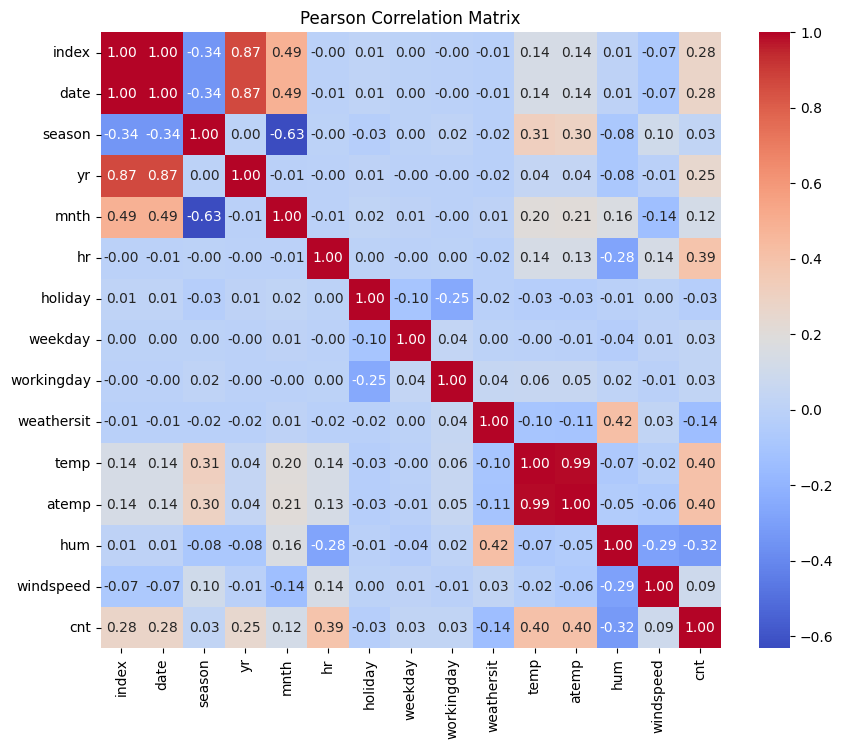

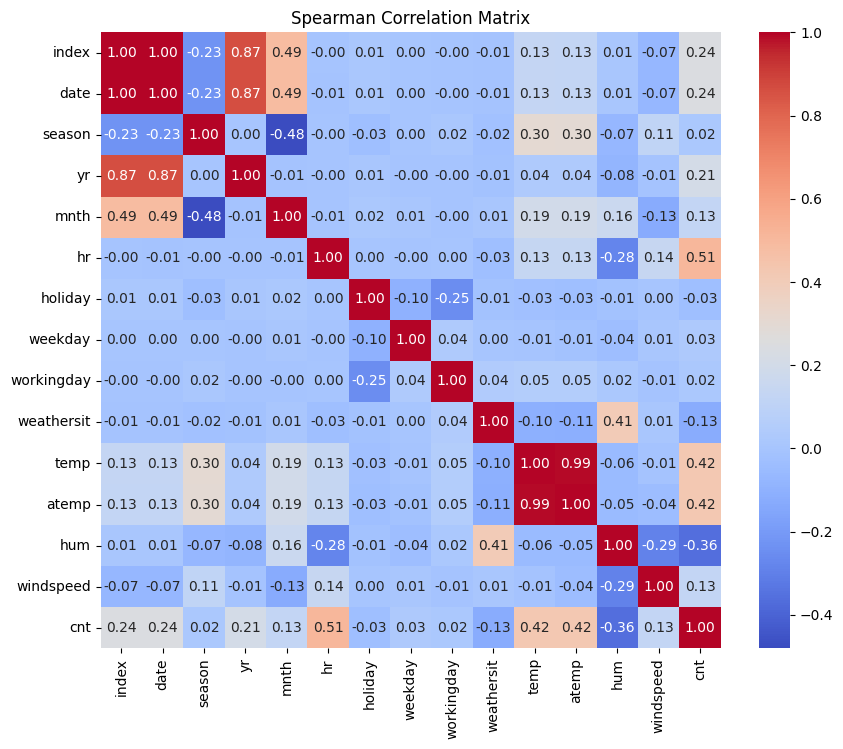

In [47]:
# Вирахування кореляційних коефіціентів за методом Пірсона
correlation_pearson = data.corr(method='pearson')

# Відображення отриманої матриці коефіціентів у вигляді теплокарти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Вирахування кореляційних коефіціентів за методом Спірмана
correlation_spearman = data.corr(method='spearman')

# Відображення отриманої матриці коефіціентів у вигляді теплокарти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


Отримані матриці кореляції за методами Пірсона і Спірмена дозволяють оцінити зв'язки між числовими змінними в наборі даних. За методом Пірсона було виявлено, що деякі змінні мають помірну або сильну лінійну залежність, тоді як за методом Спірмена було виявлено, що деякі змінні мають монотонну залежність.

Наприклад, за методом Пірсона може бути виявлено, що температура має позитивну лінійну залежність з кількістю викликів, тоді як за методом Спірмена може бути виявлено, що відношення не є лінійним, але змінні ростуть або зменшуються разом.

Враховуючи отримані кореляційні значення, можна визначити, які змінні можуть мати найбільший вплив на цільову змінну та використовувати цю інформацію для подальшого аналізу та моделювання даних.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['yr'], prefix='yr'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit')
                          ], axis=1)
    features = features.drop(['season', 'yr', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features

# Convert date column to numerical format
X['date'] = pd.to_numeric(X['date'])

# Splitting dataset into features and target variable
X = data.drop(['cnt'], axis=1)
y = data['cnt']

# Creating dummy variables for categorical features
X = get_dummies(X)

# Splitting dataset into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [ ]:
features = get_dummies(data)

NameError: name 'fetures' is not defined

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [50]:
data['night_hours'] = ((data['hr'] >= 18) | (data['hr'] < 6)).astype(int)
data = data.drop('hr', axis=1)



**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [52]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

NameError: name 'features' is not defined

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = #your code (all features)
  y = #your code (target variable)
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

